<a href="https://colab.research.google.com/github/minurijaya/ML-Assignments/blob/main/Question_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import reqired libraries

from sklearn import linear_model #It contains various linear regression models
from sklearn import datasets #provides preloaded toy datasets that are useful for testing machine learning models. like iris
from sklearn import preprocessing #The preprocessing module provides functions for feature scaling, normalization, and encoding.
import pandas as pd #a powerful data manipulation and analysis library.
import numpy as np # a numerical computing library
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,  Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.decomposition import TruncatedSVD
import math
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data set

In [ ]:
# Load the dataset

file_path = "drive/MyDrive/Colab Notebooks/ds_salaries.csv"
raw_df = pd.read_csv(file_path)


print(raw_df.head()) # display first few rows



   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000.0             EUR          85847                 ES           100   
1   30000.0             USD          30000                 US           100   
2   25500.0             USD          25500                 US           100   
3  175000.0             USD         175000                 CA           100   
4  120000.0             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1     

## Explotary Data Analysis (EDA)

Analyzed the distribution of salaries and other features to understand the data structure. Also analyse missing values in the dataset


Summary o fdata types and columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3752 non-null   object 
 2   employment_type     3752 non-null   object 
 3   job_title           3750 non-null   object 
 4   salary              3751 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3754 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB
None

Summary of statistics of the data:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.751000e+03    3755.000000   375

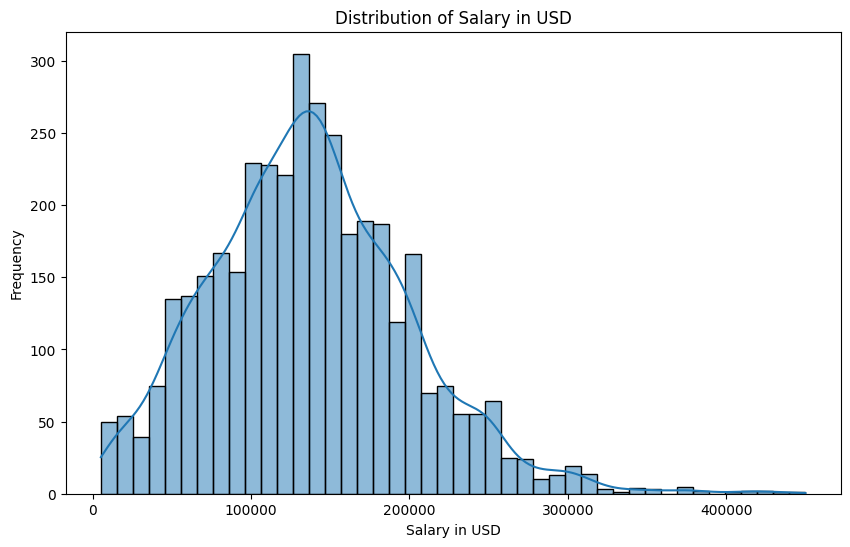

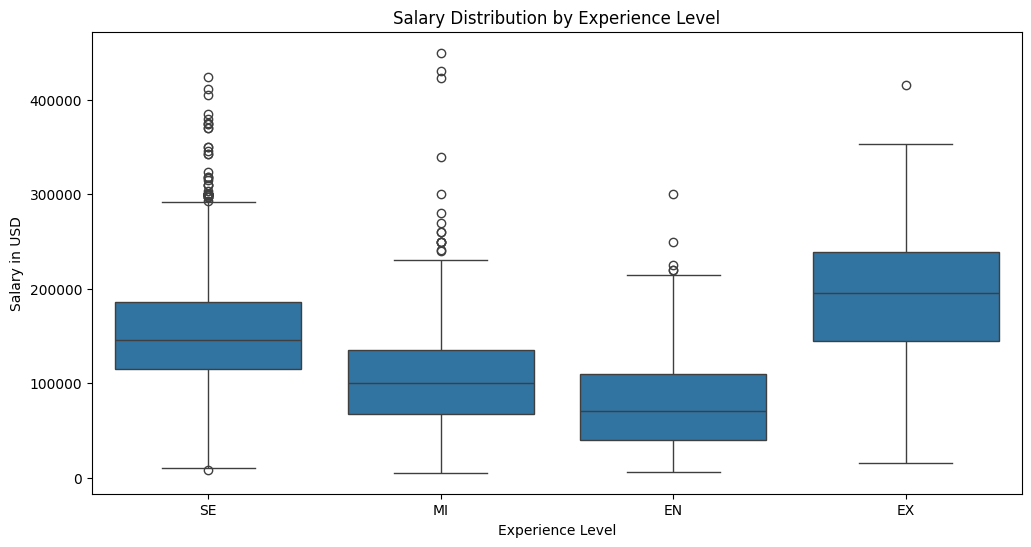

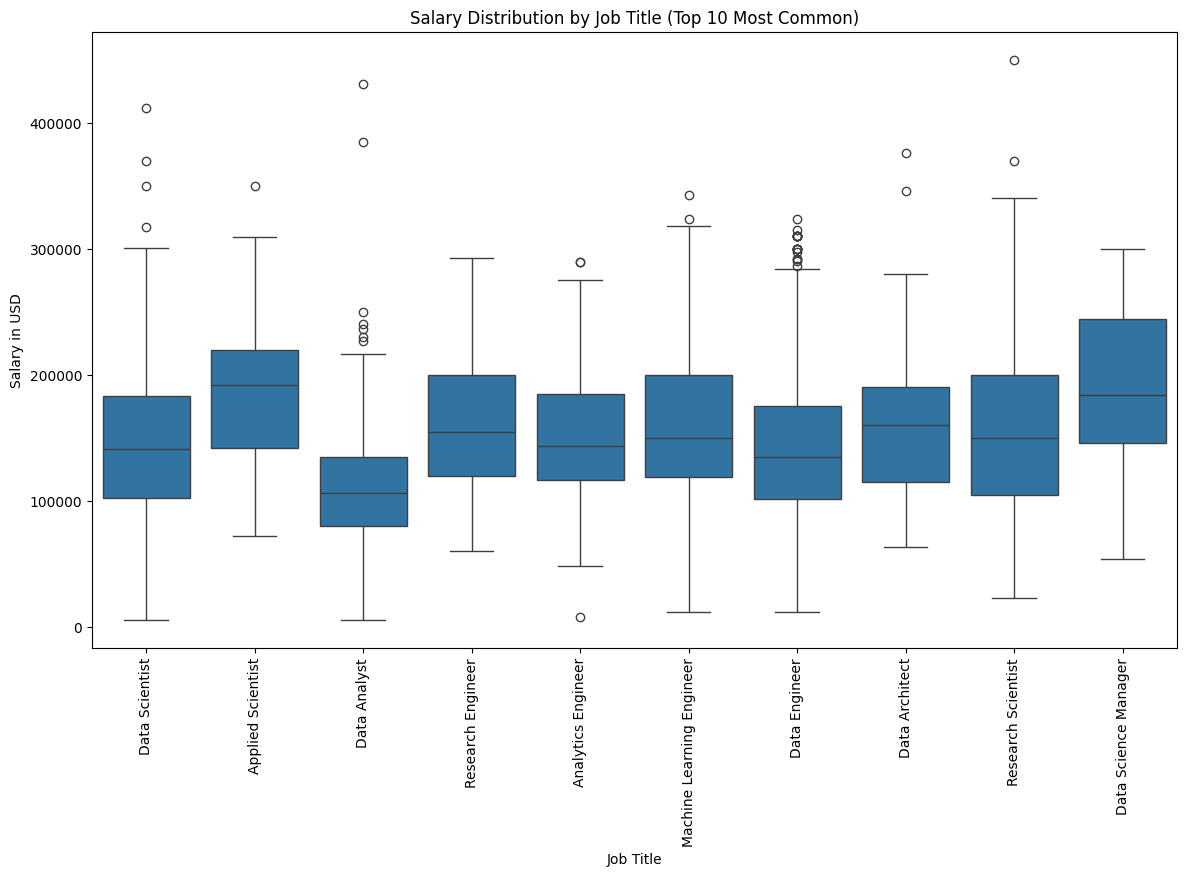

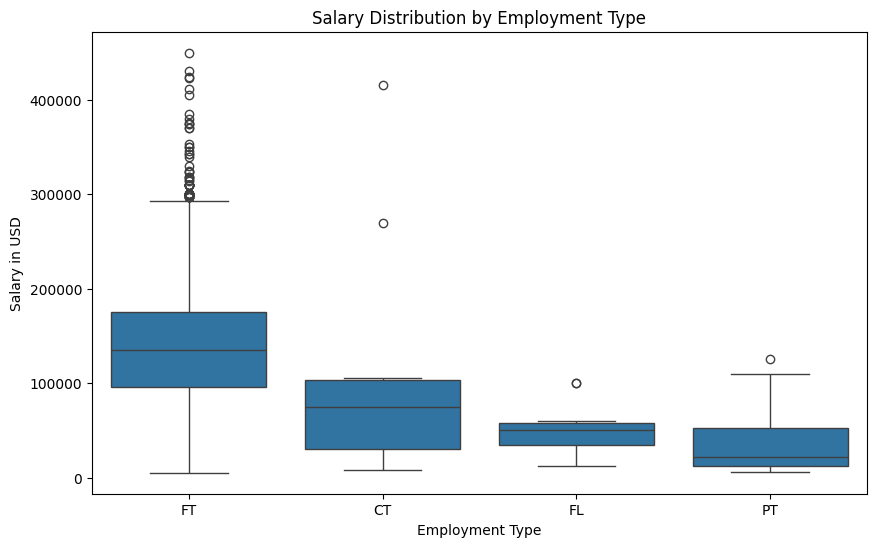

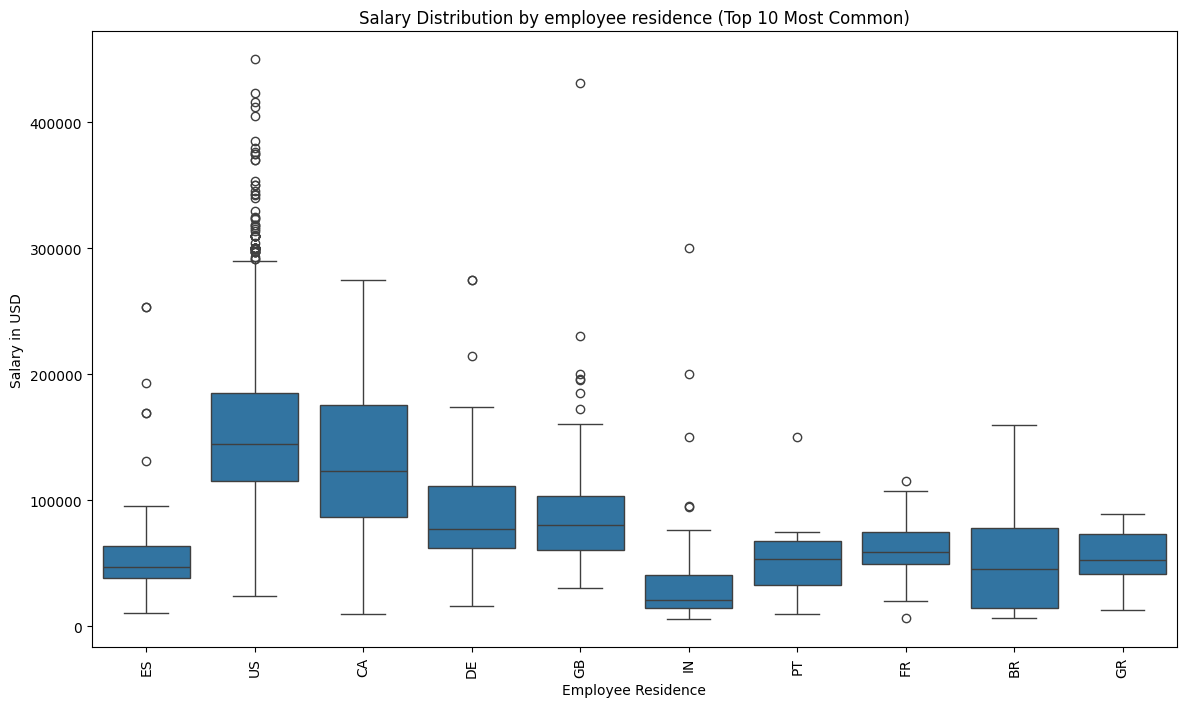

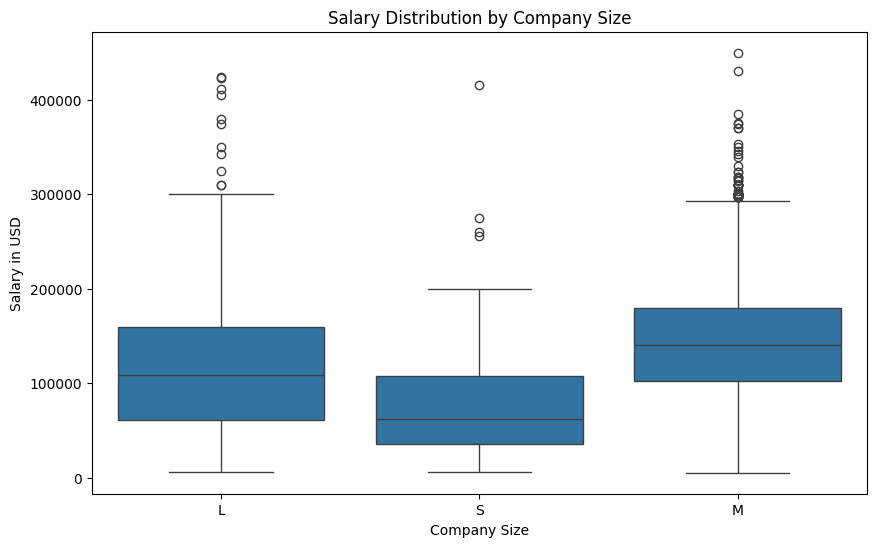

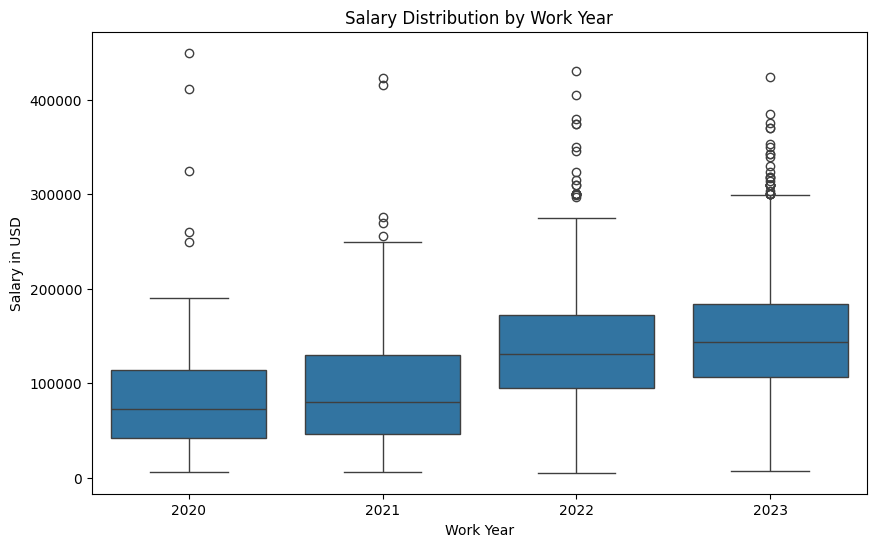

In [ ]:
# Explotary data analyse

df = raw_df.copy()

print("\nSummary o fdata types and columns:")
print(df.info())
# summary of data types of the columns - helps to understand categorical, quantitative data
#output - categorical ={experience_level,employment_type, job_title,salary_currency, employee_residence,company_location }, numerical ={work_year,salary, salary_in_usd, remote_ratio}

print("\nSummary of statistics of the data:")
print(df.describe())
#summary of statistics of the data - helps to understand distribution of numerical data

print("\nChecking for missing values:")
print(df.isnull().sum()) # count of the missing values for each column

#distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

#The salary distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

#Salary distribution by job title (top 10 job titles by frequency)
top_jobs = df['job_title'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df[df['job_title'].isin(top_jobs)])
plt.title('Salary Distribution by Job Title (Top 10 Most Common)')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()

# Salary distribution by employment_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

#Salary distribution by employee residence (top 10 residence by frequency)
top_jobs = df['employee_residence'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df[df['employee_residence'].isin(top_jobs)])
plt.title('Salary Distribution by employee residence (Top 10 Most Common)')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()

# Salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.savefig('salary_by_company_size.png')
plt.show()

# Salary distribution by work year
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()



# Identified features and output
# salary_in_usd is the target variable
df = df.drop(['salary', 'salary_currency'], axis=1)
#Drop salary, salary_currency (we're using salary_in_usd)



# features work_year, experience_level, employment_type, job_title,

## Handle Missing values

Remove identified a small number of records with missing values.

In [ ]:
# Handle missing values

for col in ['experience_level', 'employment_type', 'job_title', 'employee_residence']:
    df[col] = df[col].fillna(df[col].mode()[0])  # impute missing values of the categorical variables with mode

# df['salary'] = df['salary'].fillna(df['salary'].mean()) #impute missing values of the numeric variable with the mean
print(df.isnull().sum()) # check if the missing values are imputed

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## Handle Outliers - Outliers Removal

Applied the Interquartile Range (IQR) method to identify and remove salary outliers.

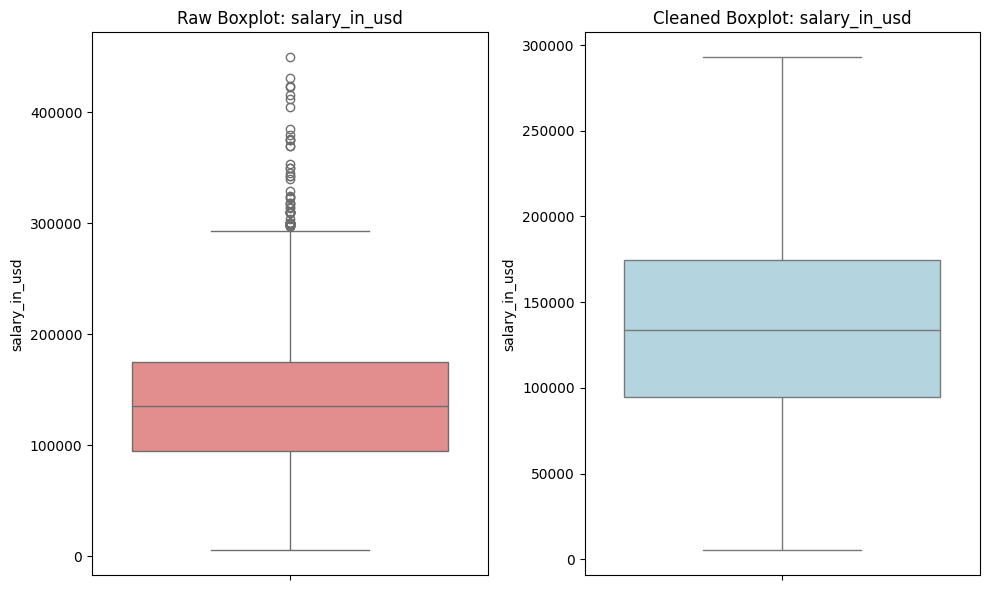

In [ ]:
#Handle Outliers - Outlier detection and removal

numerical_cols = ["salary_in_usd"]


# Make a copy for cleaning
cleaned_df = df.copy()

#Remove outliers column-by-column
for col in numerical_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]

# Plot raw vs cleaned data side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[2*i], color='lightcoral')  # raw plot
    axes[2*i].set_title(f"Raw Boxplot: {col}")

    sns.boxplot(y=cleaned_df[col], ax=axes[2*i + 1], color='lightblue')  # cleaned plot
    axes[2*i + 1].set_title(f"Cleaned Boxplot: {col}")

plt.tight_layout()
plt.show()


## Transformations

Check if the log transformation is required by checking distribution and the skewness of the target variable.

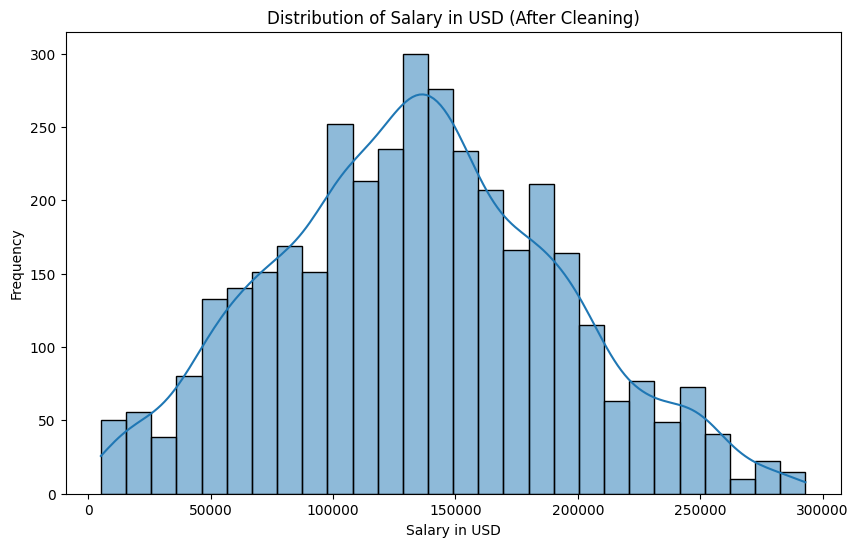

Skewness of salary_in_usd: 0.14208635437784373


In [ ]:
#see if there's a need for transformation in the target variable
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD (After Cleaning)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


# Check the skewness of the target variable
print(f"Skewness of salary_in_usd: {cleaned_df['salary_in_usd'].skew()}")







Since the skewness is < 0.5, No need of doing tranformaton


## Feature Selection and extraction

basic feature selection

In [ ]:
# Feature selection
features = [
    'work_year', 'experience_level', 'employment_type',
    'job_title', 'remote_ratio', 'company_size','employee_residence','company_location'
]
target_column = 'salary_in_usd'

X = cleaned_df[features]
y = cleaned_df[target_column]



Feature reduction

selected relevant features including 'work_year', 'experience_level', 'employment_type', 'job_title_simplified', 'remote_ratio', and 'company_size'.

Location features ('employee_residence' and 'company_location') is removed due to their high cardinality and potential for introducing noise.

In [ ]:

# Print unique values of categorical columns to understand them better
for col in ['experience_level', 'employment_type', 'company_size','job_title', 'employee_residence','company_location']:
    print(f"\nUnique values in {col}:")
    print(cleaned_df[col].value_counts())

# Here employee_residence and company_location features can be dropped from the features,
# since as we identified in the the initial data exploration, these features have extremely high cardinality:

#Job titles directly relate to skills, responsibilities, and seniority level - all of which have a strong, direct impact on salary determination
# Given the large number of unique job titles, this feature need to be simplified
# Group job titles to reduce dimensionality
print("\nTop 15 job titles by frequency:")
print(cleaned_df['job_title'].value_counts().head(15))

# For titles with few occurrences, we can group them as "Other"
title_counts = cleaned_df['job_title'].value_counts()
common_titles = title_counts[title_counts >= 20].index  # Keep titles with at least 20 occurrences
cleaned_df['job_title_simplified'] = cleaned_df['job_title'].apply(
    lambda x: x if x in common_titles else 'Other'
)

print("\nNumber of unique job titles after simplification:")
print(cleaned_df['job_title_simplified'].nunique())



# Update features
features = [
    'work_year', 'experience_level', 'employment_type',
    'job_title_simplified', 'remote_ratio', 'company_size'
]

X = cleaned_df[features]
y = cleaned_df[target_column]

# Check the shapes to make sure they match
print(f"Shape of df_processed_svd: {X.shape}")
print(f"Length of y: {len(y)}")


Unique values in experience_level:
experience_level
SE    2473
MI     800
EN     319
EX     100
Name: count, dtype: int64

Unique values in employment_type:
employment_type
FT    3656
PT      17
FL      10
CT       9
Name: count, dtype: int64

Unique values in company_size:
company_size
M    3103
L     442
S     147
Name: count, dtype: int64

Unique values in job_title:
job_title
Data Engineer                1026
Data Scientist                830
Data Analyst                  610
Machine Learning Engineer     283
Analytics Engineer            102
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 92, dtype: int64

Unique values in employee_residence:
employee_residence
US    2945
GB     166
CA      84
ES      80
IN      70
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 77, d

Applied job title simplification to address the high cardinality issue, grouping less frequent titles into an "Other" category

Standardize Numerical features and One-hot encoding on categorical features

In [ ]:

# Define preprocessing for numeric features
numeric_features = ['remote_ratio']

# Define preprocessing for categorical features
categorical_features = ['work_year', 'experience_level', 'employment_type', 'job_title_simplified', 'company_size']

# Create a ColumnTransformer that applies different preprocessing steps to different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Apply StandardScaler to numeric features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Apply OneHotEncoder to categorical features
    ]
)

# Apply the transformations to the data
X_processed = preprocessor.fit_transform(X)






Feature dimentionality reduction with SVD
Implemented SVD (Singular Value Decomposition) to reduce feature dimensionality while preserving 95% of the variance.

Number of components needed for 95% variance: 13


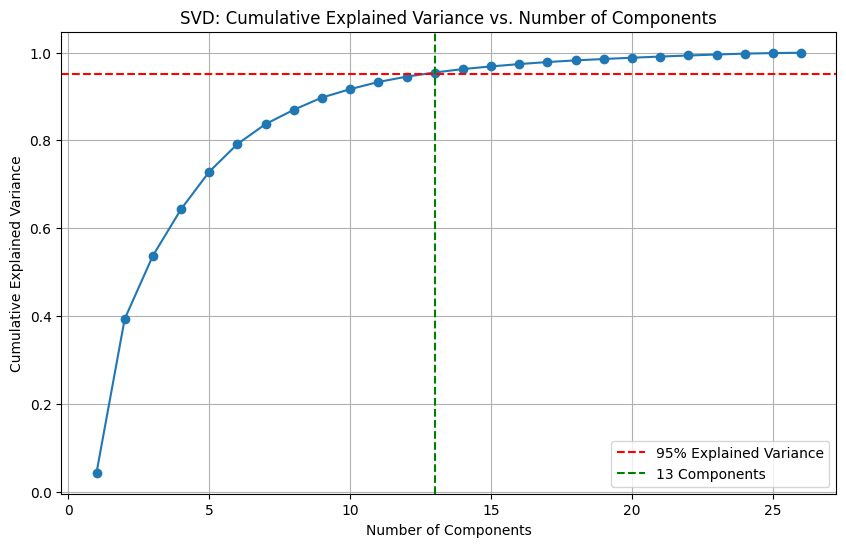

Data shape after SVD: (3692, 13)
Dimensionality reduction: 27 -> 13


In [ ]:
# # Impute missing values using the median strategy
# imputer = SimpleImputer(strategy='median')
# df_processed_imputed = pd.DataFrame(
#     imputer.fit_transform(df_processed),  # Remove .toarray()
#     columns=df_processed.columns
# )


# Apply SVD for feature reduction
# Calculate number of components that explain 95% of variance
svd = TruncatedSVD(n_components=min(X_processed.shape[1]-1, 100))
svd.fit(X_processed)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components_95}")

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='--',
 label=f'{n_components_95} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD: Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Create SVD with optimal number of components
svd_optimal = TruncatedSVD(n_components=n_components_95)
X_svd = svd_optimal.fit_transform(X_processed)
print(f"Data shape after SVD: {X_svd.shape}")
print(f"Dimensionality reduction: {X_processed.shape[1]} -> {X_svd.shape[1]}")

df_processed_svd = pd.DataFrame(X_svd)


This transformation reduced the feature space from 27 dimensions to 13 dimensions.

## Data Splitting

Split the dataset to train and test the model (80% train, 20% test)

In [ ]:
# data splitting - Train and test data splitting
# Split data (80% train, 20% test)
# Check the shapes to make sure they match
print(f"Shape of df_processed_svd: {df_processed_svd.shape}")
print(f"Length of y: {len(y)}")
X_train, X_test, y_train, y_test = train_test_split(df_processed_svd, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Shape of df_processed_svd: (3692, 13)
Length of y: 3692
Training set size: (2953, 13), Test set size: (739, 13)


## Model Building and Evaluation


## Model 1 - Linear Regression Model

# Version 1 - A basic linear regression model

Build the model

In [ ]:
# linear Regression Model Build

# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)


Model Evaluations

In [ ]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = math.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Evaluation Metrics:")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R² Score: {lr_r2:.4f}")


Linear Regression Evaluation Metrics:
MSE: 2601746993.14
RMSE: 51007.32
MAE: 40183.18
R² Score: 0.2432


Visualize the results with a residual plot

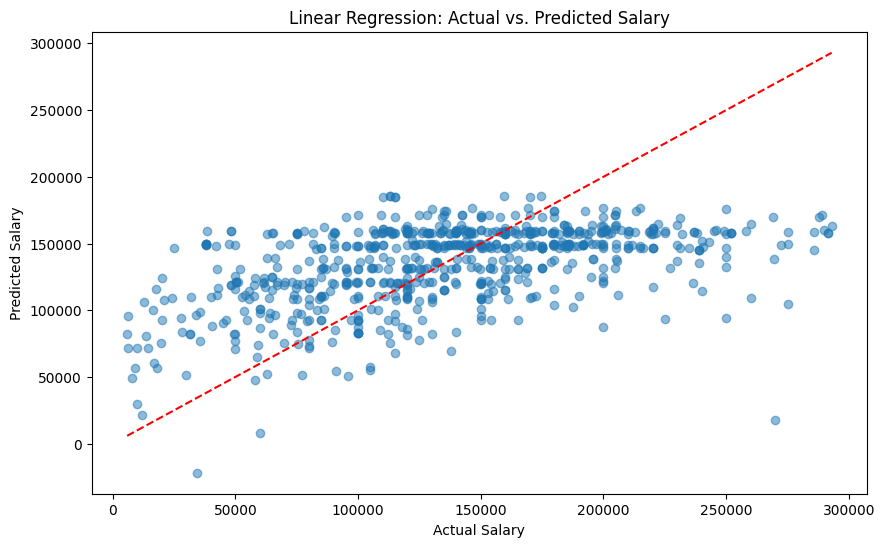

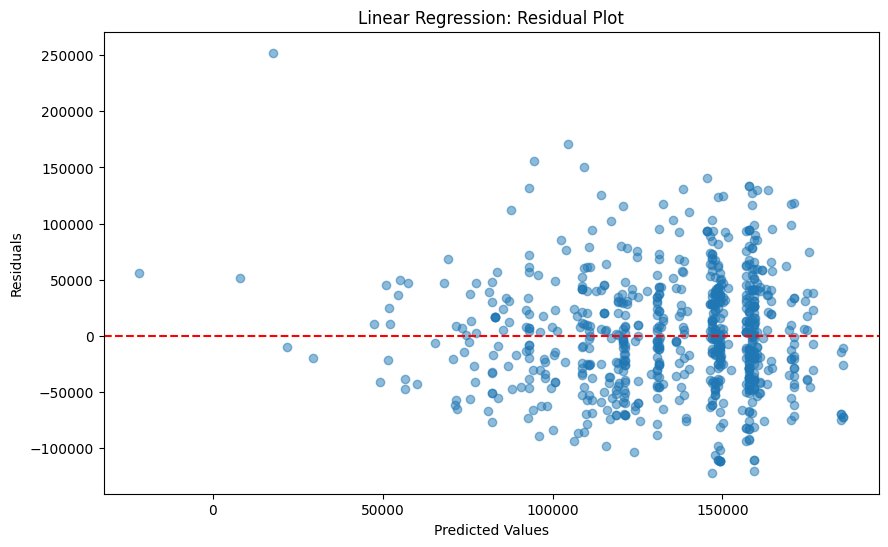

In [ ]:
# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs. Predicted Salary')
plt.show()

# Residual analysis
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()

# Version 2 - Enhanced Linear Regression model

Model Building
 - Enhanced the model with polynomial features and standardization in a pipeline structure
 - Performed hyperparameter tuning using GridSearchCV with 5-fold cross-validation

In [ ]:
# Create pipeline with polynomial features
poly_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add scaling before polynomial features
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parameters to search
poly_linear_params = {
    'poly__degree': [1, 2, 3],
    'poly__interaction_only': [False, True],  # Add this parameter to test interaction terms only
    'linear__fit_intercept': [True, False]
}

# Grid search with cross-validation
print("Optimizing Linear Regression with polynomial features...")
poly_linear_grid = GridSearchCV(
    poly_linear_pipeline,
    poly_linear_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the model
poly_linear_grid.fit(X_train, y_train)

# Get the best model and parameters
best_linear_model = poly_linear_grid.best_estimator_
print(f"Best parameters for improved Linear Regression: {poly_linear_grid.best_params_}")
print(f"Best cross-validation score: {-poly_linear_grid.best_score_:.2f}")

# Make predictions with the best model
y_pred_linear = best_linear_model.predict(X_test)

Optimizing Linear Regression with polynomial features...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for improved Linear Regression: {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__interaction_only': True}
Best cross-validation score: 2407774259.46


Model Evaluation
Evaluate the model using multiple metrics: MSE, RMSE, MAE, and R² Score


Improved Linear Regression Evaluation Metrics:
MSE: 2572031868.40
RMSE: 50715.20
MAE: 39789.27
R² Score: 0.2519


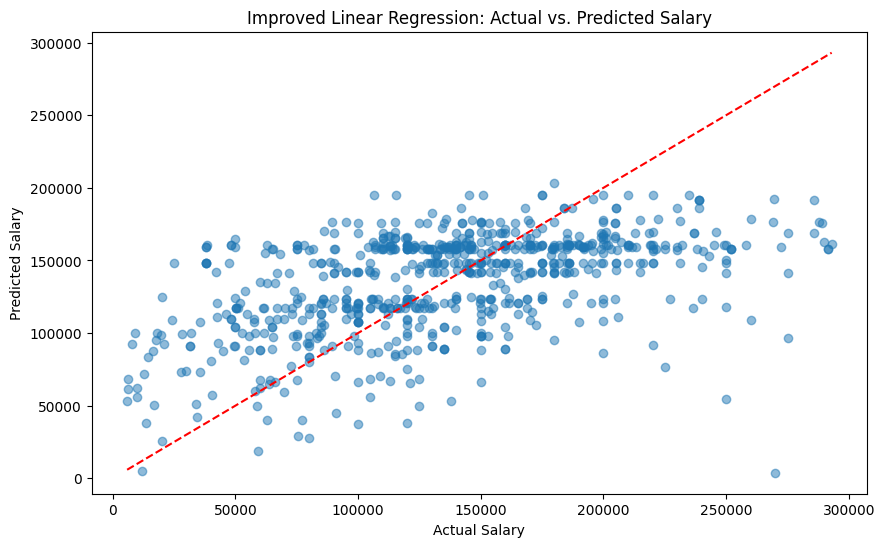

In [ ]:
# Evaluate the best model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = math.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("\nImproved Linear Regression Evaluation Metrics:")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R² Score: {linear_r2:.4f}")

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Improved Linear Regression: Actual vs. Predicted Salary')
plt.show()



There is a slight improvement with the enhanced model
- RMSE decreased by 292.12 (0.57% improvement)
- MAE decreased by 393.91 (0.98% improvement)
- R² increased by 0.0087 (3.58% improvement)




# Model 2 - Ridge Regression model

# Version 1 - Ridge regression with alpha parameter tuning

Model builing - Implement Ridge regression with alpha parameter tuning and apply GridSearchCV to find the optimal regularization strength

In [ ]:
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to data
print("Training Ridge regression with hyperparameter tuning...")
ridge_grid.fit(X_train, y_train)

# Best parameters and scores
print(f"Best Ridge parameters: {ridge_grid.best_params_}")
print(f"Best cross-validation score (neg MSE): {ridge_grid.best_score_:.2f}")

# Get best model
best_ridge = ridge_grid.best_estimator_

# Make predictions with best model
y_pred_ridge = best_ridge.predict(X_test)


Training Ridge regression with hyperparameter tuning...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Ridge parameters: {'alpha': 1.0}
Best cross-validation score (neg MSE): -2466637853.81


Best alpha value was determined to be 1.0

Model Evaluation


Ridge Regression Evaluation Metrics:
MSE: 2601257581.14
RMSE: 51002.53
MAE: 40187.23
R² Score: 0.2434


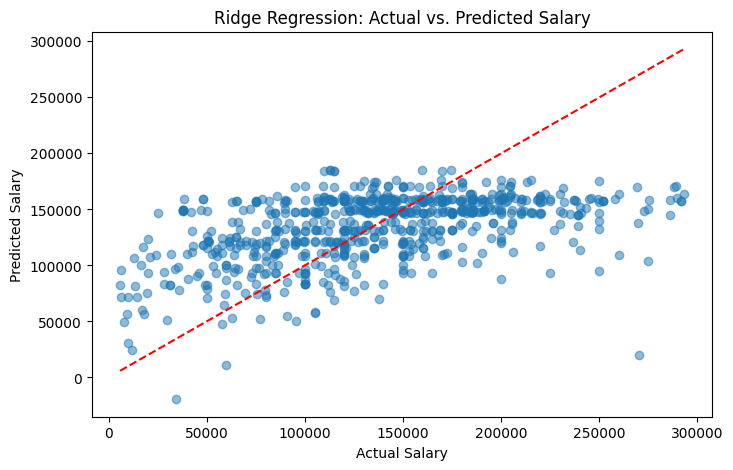

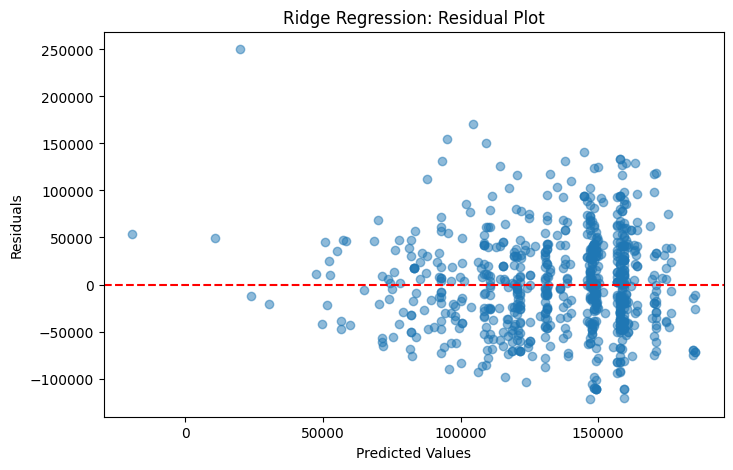

In [ ]:
# Evaluate best model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = math.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Evaluation Metrics:")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R² Score: {ridge_r2:.4f}")

# Visualize actual vs. predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression: Actual vs. Predicted Salary')
plt.show()

# Residual analysis
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residual Plot')
plt.savefig('ridge_residuals.png')
plt.show()
